In [101]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [100]:
# poisson uses lambda, lets set up
λ = 2
cars_drive_window = stats.poisson(λ)

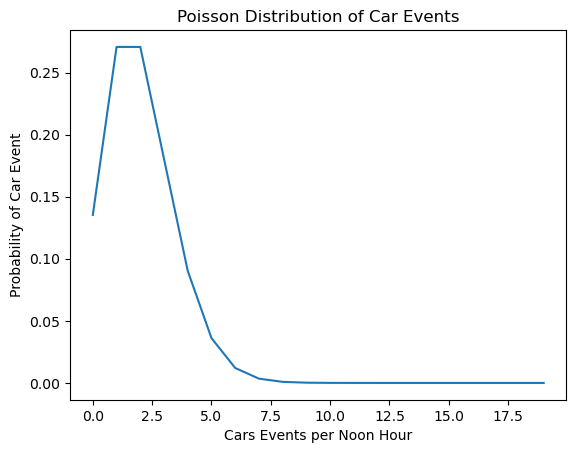

In [103]:
# making a chart
x = np.arange(0,20)
y = [cars_drive_window.pmf(i) for i in x]
plt.plot(x,y)
plt.xlabel('Cars Events per Noon Hour')
plt.ylabel('Probability of Car Event')
plt.title('Poisson Distribution of Car Events')
plt.show()

> What is the probability that no cars drive up in the noon hour?

In [3]:
# take the probability mass function because cars are discrete and we want exactly 0
cars_drive_window.pmf(0)

0.1353352832366127

> What is the probability that 3 or more cars come through the drive through?

In [7]:
# usinf the survival function, which is non inclusive so used 2 to capture 3 or more
cars_drive_window.sf(2)

0.32332358381693654

>How likely is it that the drive through gets at least 1 car?

In [8]:
# one possible way
1 - cars_drive_window.pmf(0)

# another way using the survival function
cars_drive_window.sf(0)

0.8646647167633873

### Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [60]:
# setup the mean, std, and variable with normal distirbution
μ = 3.0
σ = .3

grades = stats.norm(μ, σ)

>What grade point average is required to be in the top 5% of the graduating class?

In [17]:
# usinf the inverse suirvival function to use the probability of the top of somethingm
round(grades.isf(.05), 1)

3.5

>What GPA constitutes the bottom 15% of the class?

In [16]:
# for the bottom, we will use a probabilty point fiunctoin
round(grades.ppf(.15), 1)

2.7

>An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [25]:
# I believe the third decile is from 21 % to %30 percent but I may be wrong
# the first number is where the range begins the scond number is where the range ends
grades.ppf(.21), grades.ppf(.3)

# Yes a tudent woith a 2.8 gpa qwould qualify

(2.7580736258945278, 2.842679846187588)

>If I have a GPA of 3.5, what percentile am I in?

In [63]:
# The cumulative distribution functoin is used to show who all is begind the perso
# this shows that they are better than this percetnatge of students
grades.cdf(3.5)

0.9522096477271853

In [64]:
# Subtracting the cdf from 1 will show what percentile the student is in
1 - grades.cdf(3.5)

0.047790352272814696

In [67]:
# the sf will show which top percent they are in, but I prefer the method above
grades.sf(3.499999)

0.04779068386419847

### A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [34]:
# I believe this is a binomial distibution becasue we have specific probability 
# and we want to find the likely hood that this condition is true

# there are this many visitors
n = 4326
# this is the proability of a click
p = 0.02

clicks = stats.binom(n, p)

In [36]:
# how likely is it that 97 people or more click through?
clicks.sf(96)

0.13975823631416448

In [37]:
# there is a possibility that this is a poisson but I will wait to see

In [71]:
# jk, it says rate and poisson is about rate
λ = 2

clicks = stats.poisson(λ)

In [73]:
clicks_adjusted = stats.poisson((λ * 4326/100))

In [74]:
clicks_adjusted.sf(96)

0.14211867659283192

### You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

In [78]:
# 100 questions
# the possible answers are between .00 to 1.00 because probabilty only goes to 1 so this is the probabilty of success
# the question below
n = 60
p = .01

homework = stats.binom(n, p)

> What is the probability that at least one of your first 60 answers is correct?

In [79]:
homework.cdf(1)

0.01698082317804481

### The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

In [81]:
# Students probability first
# how many students
n_students  = 3 * 22

# how many students visit the breakroom on a given day
p_visit_area = .9

student_visit_area = stats.binom(n_students, p_visit_area)

student_visit_area.isf(.60)

59.0

In [91]:
# chance of clean
p = .03
# the trials is the studetn entering the clas
n = 59
# there is a .03 chance for each individual student
cleaned_day = stats.binom(n, p)

>How likely is it that the break area gets cleaned up each day?

In [92]:
# the probability that at least one student cleans the break room
cleaned_day.sf(0)

0.8342199288437352

>How likely is it that it goes two days without getting cleaned up? All week?

In [89]:
# the number or trials doubles, but the probability does not change
cleaned_two_day = stats.binom(n * 2, p)
cleaned_two_day.pmf(0)

In [98]:
cleaned_five_day = stats.binom(n * 5, p)
cleaned_five_day.pmf(0)

0.00012521651388091245

> WRONG

In [94]:
## WRONG LOL
# this is the likley hood of 2 days no cleaning
## I think this is wrong
cleaned_day.pmf(0) * 2

0.33156014231252906

In [99]:
# the likelihood that 5 days no cleaning
cleaned.pmf(0) * 5

0.8289003557813226

In [94]:
# make an not_cleaned variabel
not_cleaned = stats.binom(n, (1-p))

### You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [102]:
# normal distrubition setup
# mean and std in units of people
μ = 15
σ = 3

people_in_line = stats.norm(μ, σ)


In [106]:
# adjusting the mean andf std to acocunt for the time each person needs to order and the extra time needed for you 

time_for_food = stats.norm((μ * 2)+10, σ * 2)

In [107]:
# for theere to be 15 minutes left, food must oinly take 45 minutes out of an hour
# what is the likelihood that the food will be ready in 45 minutes?

time_for_food.cdf(45)

0.7976716190363569

### Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [5]:
import env

In [8]:
# placing the current employee salaries into the variable salaries
salaries = pd.read_sql('SELECT * FROM salaries WHERE to_date > now()', env.get_db_url('employees'))

In [10]:
# Inspecting 
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [18]:
# getting the mean and std of the salaries
μ = round(salaries['salary'].mean(), 2)
σ = round(salaries['salary'].std(), 2)

emp_sal = stats.norm(μ, σ)

>What percent of employees earn less than 60,000?

In [25]:
# using the cumulative distribution of the salaries
emp_sal.cdf(59_999.99)

0.24385722667952825

In [27]:
# looking into the actual data
(salaries['salary'] < 60000).mean()

0.2705727041028802

>What percent of employees earn more than 95,000?

In [29]:
# Using the survivial function at 95000
emp_sal.sf(95_000)

0.09208829007127312

In [30]:
# checking the data set
(salaries['salary'] > 95000).mean()

0.1086272092752078

>What percent of employees earn between 65,000 and 80,000?

In [32]:
# need to subtract to find the percentage of the range
emp_sal.cdf(80_000) - emp_sal.cdf(65_000)

0.33506048676360467

In [36]:
# finding the amount from the dataset
((salaries['salary'] >= 65000) & (salaries['salary'] <= 80000)).mean()

0.32515700221552196

>What do the top 5% of employees make?

In [40]:
# inverse survival
emp_sal.isf(.05)

100484.65628252999

In [57]:
# finding the avg of the top 5% of peoples salary
salaries['salary'].sort_values(ascending=False).head(int(round(len(salaries) * .05, 0))).mean()

113408.81750791271

>> Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so: